<a href="https://colab.research.google.com/github/capitallatera/Project_1/blob/master/Mimic_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import psycopg2
from IPython.display import display, HTML # used to print out pretty pandas dataframes
import matplotlib.dates as dates
import matplotlib.lines as mlines

%matplotlib inline
plt.style.use('ggplot') 

# specify user/password/where the database is
sqluser = 'datascientist'
sqlpass = 'candidate'
port = '54321'
dbname = 'mimic'
schema_name = 'mimiciii'
host = '3.7.155.14'

query_schema = 'SET search_path to ' + schema_name + ';'

# connect to the database
con = psycopg2.connect(dbname=dbname, user=sqluser, password=sqlpass, host=host)

/usr/local/lib/python3.6/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [ ]:
pip install psycopg2-binary

In [3]:
# create a database connection
host="3.7.155.14"
port=5432
user = 'datascientist'
password="candidate"
dbname = 'mimic'
schema_name = 'mimiciii'

In [26]:
query = query_schema + """
select *
from admissions
"""
df = pd.read_sql_query(query,con)

In [27]:
df.head()

,row_id,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,language,religion,marital_status,ethnicity,edregtime,edouttime,diagnosis,hospital_expire_flag,has_chartevents_data
0,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,None,UNOBTAINABLE,MARRIED,WHITE,2196-04-09 10:06:00,2196-04-09 13:24:00,BENZODIAZEPINE OVERDOSE,0,1
1,22,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,NaT,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,None,CATHOLIC,MARRIED,WHITE,NaT,NaT,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,1
2,23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,NaT,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,NaT,NaT,BRAIN MASS,0,1
3,24,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,NaT,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Private,None,PROTESTANT QUAKER,SINGLE,WHITE,NaT,NaT,INTERIOR MYOCARDIAL INFARCTION,0,1
4,25,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,None,UNOBTAINABLE,MARRIED,WHITE,2160-11-02 01:01:00,2160-11-02 04:27:00,ACUTE CORONARY SYNDROME,0,1


In [28]:
# count the total no of Admissions
df.shape

(58976, 19)

In [43]:
# What percentage of Admissions was under Emergency
(df[df.admission_type=="EMERGENCY"].shape[0]/df.shape[0])*100

71.33579761258817

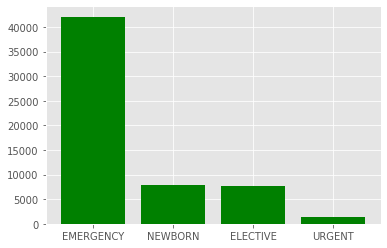

In [61]:
# Plot a graph of the count of various types of Admissions as a bar graph using python
import seaborn as sns
import matplotlib.pyplot as plt

df.admission_type.value_counts()
name=["EMERGENCY","NEWBORN","ELECTIVE","URGENT"]
value=list(df.admission_type.value_counts())

fig=plt.figure()
plt.bar(name,value,color='green')
plt.show()


In [70]:
# df.diagnosis.value_counts()


NEWBORN                                                       7823
PNEUMONIA                                                     1566
SEPSIS                                                        1184
CONGESTIVE HEART FAILURE                                       928
CORONARY ARTERY DISEASE                                        840
                                                              ... 
SKULL FRACTURE/SDA                                               1
CROHN'S FLARE;CONTAINED FERFORATION                              1
BARRETTS ESOPHAGUS\ENDOSCOPY WITH RADIO FREQUENCY ABLATION       1
SUPERIOR MESENTERIC EMBOLUS                                      1
RESOLVED UPPER GI BLEED                                          1
Name: diagnosis, Length: 15691, dtype: int64